 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [99]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import quandl
from pathlib import Path


%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [49]:
# setting path for whale, google, and sp500 
csvpatha = Path("Resources/whale_returns.csv")
csvpathb = Path("Resources/algo_returns.csv")
csvpathc = Path("Resources/sp500_history.csv")


In [50]:

# Reading and setting up Date as Index whale
whale_returns = pd.read_csv(csvpatha,index_col='Date',parse_dates=True)
whale_returns = whale_returns.sort_index()

whale_returns.index=pd.to_datetime(whale_returns.index)


whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [51]:
# Count nulls
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [52]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [53]:
# Reading algorithmic returns

algo_returns = pd.read_csv(csvpathb,index_col='Date',parse_dates=True)
algo_returns.index=pd.to_datetime(algo_returns.index)     
algo_returns = algo_returns.sort_index()

algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [54]:
# Count nulls
algo_returns.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [55]:
# Drop nulls

algo_returns=algo_returns.dropna()

algo_returns


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [56]:
# Reading S&P 500 Closing Prices
sp_hist= pd.read_csv(csvpathc,index_col='Date',parse_dates=True)
sp_hist.index=pd.to_datetime(sp_hist.index)     
sp_hist = sp_hist.sort_index()


sp_hist.head()

/var/folders/v3/n0q3tckx219c79ktxnp1bszw0000gn/T/ipykernel_24458/1656453148.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp_hist= pd.read_csv(csvpathc,index_col='Date',parse_dates=True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp_hist.dtypes


Close    object
dtype: object

In [57]:
# taking off all dollar sign symbols for sp
   
sp_hist["Close"] = [x.strip("$")for x in sp_hist["Close"]]
    
print(sp_hist)


              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93
...             ...
2019-04-16  2907.06
2019-04-17  2900.45
2019-04-18  2905.03
2019-04-22  2907.97
2019-04-23  2933.68

[1649 rows x 1 columns]


In [58]:
# Fix Data Types

sp_hist= sp_hist.replace('[^\d.]','',regex=True).astype(float)
                      

In [59]:
# Calculate Daily Returns

daily_returns = sp_hist.pct_change()
daily_returns = sp_hist.pct_change().astype(float)


daily_returns.dropna()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [60]:
# Drop nulls

sp_hist.dropna()
sp_hist

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [61]:
# Rename `Close` Column to be specific to this portfolio.
sp= sp_hist.rename(columns={'Close':'SpDaily_returns'}, inplace=True)
sp_hist.dropna(inplace=True)


sp_hist

,SpDaily_returns
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


## Combine Whale, Algorithmic, and S&P 500 Returns

In [62]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

daily_returns = sp_hist.pct_change()
df = pd.concat([whale_returns,algo_returns,daily_returns], axis = "columns", join="inner")
df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SpDaily_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [63]:
df.sort_index(ascending=True, inplace=True)
df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SpDaily_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

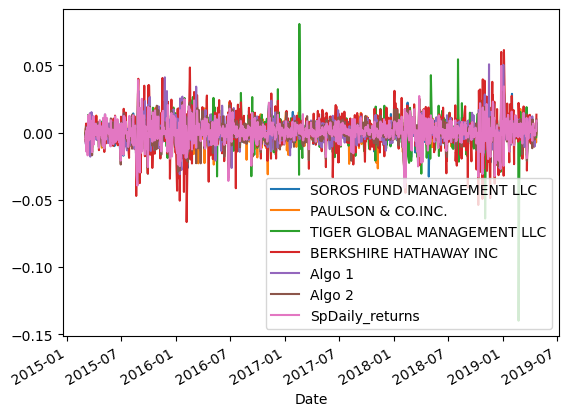

In [64]:
# Plot daily returns of all portfolios

daily_returnsdf = df.pct_change()
daily_returnsdf.head()
df.plot()


#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns of Whale,Algo,and Sp500 '}, xlabel='Date'>

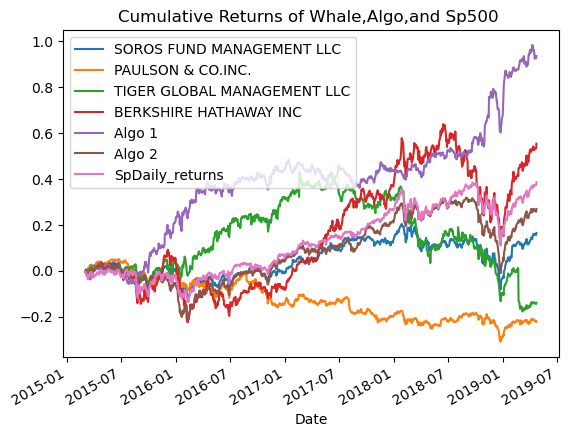

In [65]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + df).cumprod() - 1
cumulative_returns

# Plot cumulative returns
cumulative_returns.plot(title="Cumulative Returns of Whale,Algo,and Sp500 ")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

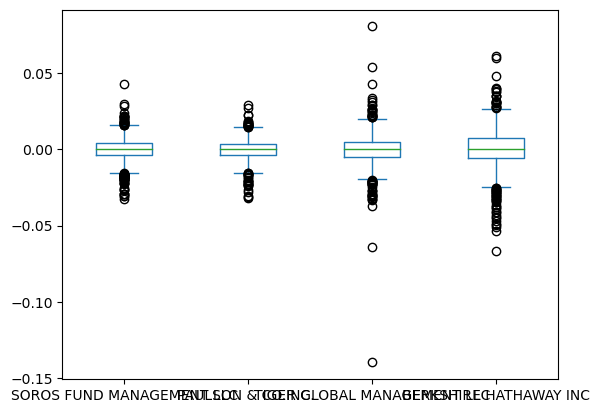

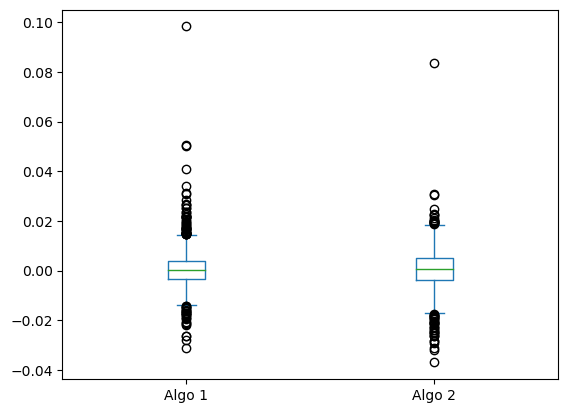

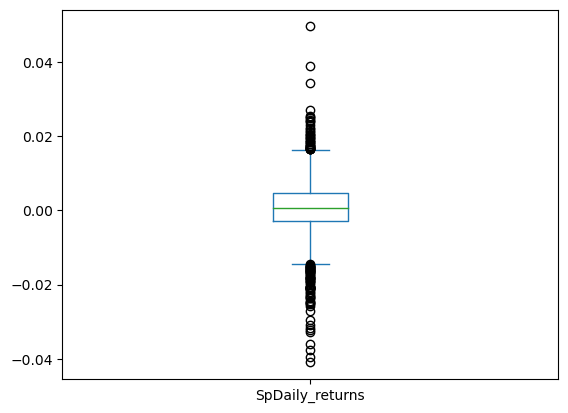

In [66]:
# Box plot to visually show risk

whale_returns.plot.box()
algo_returns.plot.box()
daily_returns.plot.box()


### Calculate Standard Deviations

In [67]:
# Calculate the daily standard deviations of all portfolios
daily_std =df.std()

daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SpDaily_returns                0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [68]:
# Calculate  the daily standard deviation of S&P 500
spdaily_std =daily_returns.std()
spdaily_std
# Determine which portfolios are riskier than the S&P 500
daily_std=daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SpDaily_returns                0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Calculate the Annualized Standard Deviation

In [69]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SpDaily_returns                0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

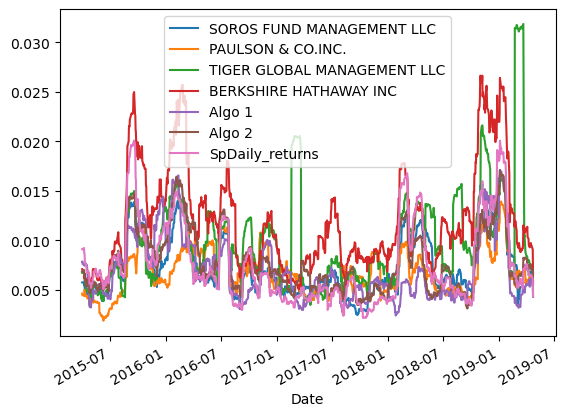

In [70]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

df.rolling(window=21).std().plot()


# Plot the rolling standard deviation


### Calculate and plot the correlation

<Axes: >

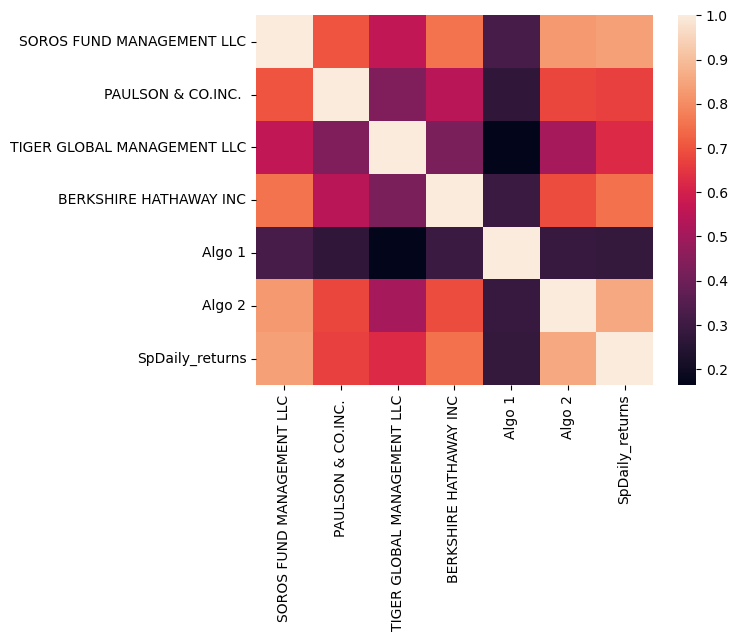

In [71]:
# Calculate the correlation
correlation = df.corr()

# Display de correlation matrix

sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

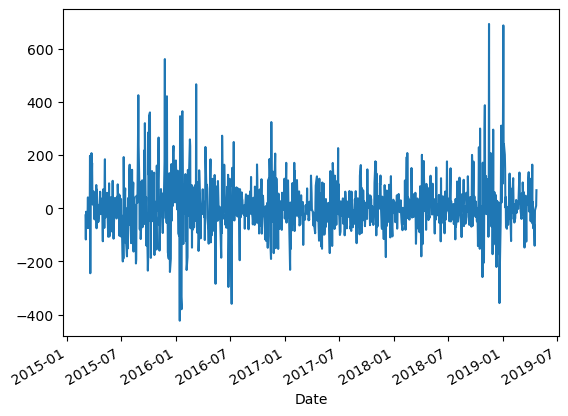

In [72]:
# Calculate covariance of a single portfolio
covariance =df['Algo 1']
covariance


# Calculate variance of S&P 500
varianceSp =df['SpDaily_returns'].var()
varianceSp


# Computing beta
beta = covariance / varianceSp
beta

# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window




---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

In [28]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path



%matplotlib inline

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [73]:
# Reading data from 1st stock
csvpath =Path("Resources/AMZN.csv")

Amazon_returns= pd.read_csv(csvpath, index_col='Date',parse_dates=True)
Amazon_returns = Amazon_returns.sort_index()
Amazon_returns.head()

,Close
Date,
2022-01-03 16:00:00,170.40
2022-01-04 16:00:00,167.52
2022-01-05 16:00:00,164.36
2022-01-06 16:00:00,163.25
2022-01-07 16:00:00,162.55


In [74]:
# Reading data from 2nd stock

SBUXPATH = Path("Resources/SBUX.csv")
SBUX =  pd.read_csv(SBUXPATH,index_col='Date',parse_dates=True)
SBUX = SBUX.sort_index()
SBUX.head()

,Close
Date,
2022-01-03 16:00:00,116.68
2022-01-04 16:00:00,114.24
2022-01-05 16:00:00,110.44
2022-01-06 16:00:00,111.14
2022-01-07 16:00:00,107.57


In [75]:
# Reading data from 3rd stock
TSLAPATH = Path("Resources/TSLA.csv")



TSLA =  pd.read_csv(TSLAPATH,index_col='Date',parse_dates=True)
TSLA = TSLA.sort_index()
TSLA.head()


,Close
Date,
2022-01-03 16:00:00,399.93
2022-01-04 16:00:00,383.20
2022-01-05 16:00:00,362.71
2022-01-06 16:00:00,354.90
2022-01-07 16:00:00,342.32


In [76]:
# Combine all stocks in a single DataFrame
Stocks_df = pd.concat([Amazon_returns,SBUX,TSLA], axis = "columns", join="inner")
Stocks_df.sort_index(inplace=True)

Stocks_df


,Close,Close,Close
Date,,,
2022-01-03 16:00:00,170.40,116.68,399.93
2022-01-04 16:00:00,167.52,114.24,383.20
2022-01-05 16:00:00,164.36,110.44,362.71
2022-01-06 16:00:00,163.25,111.14,354.90
2022-01-07 16:00:00,162.55,107.57,342.32
...,...,...,...
2022-12-23 16:00:00,85.25,98.27,123.15
2022-12-27 16:00:00,83.04,99.20,109.10
2022-12-28 16:00:00,81.82,98.60,112.71


In [77]:
# Reset Date index
Stocks_df.index=pd.to_datetime(Stocks_df.index)
Stocks_df

,Close,Close,Close
Date,,,
2022-01-03 16:00:00,170.40,116.68,399.93
2022-01-04 16:00:00,167.52,114.24,383.20
2022-01-05 16:00:00,164.36,110.44,362.71
2022-01-06 16:00:00,163.25,111.14,354.90
2022-01-07 16:00:00,162.55,107.57,342.32
...,...,...,...
2022-12-23 16:00:00,85.25,98.27,123.15
2022-12-27 16:00:00,83.04,99.20,109.10
2022-12-28 16:00:00,81.82,98.60,112.71


In [88]:
# Reorganize portfolio data by having a column per symbol
Stocks_df=Amazon_returns.rename(columns={'Close':'AMZN'}, inplace=True)
Amazon_returns.dropna(inplace=True)
Amazon_returns.head()


Stocks_df=SBUX.rename(columns={'Close':'SBUX'}, inplace=True)
SBUX.dropna(inplace=True)
SBUX.head()

Stocks_df=TSLA.rename(columns={'Close':'TSLA'}, inplace=True)
TSLA.dropna(inplace=True)
TSLA.head()




,TSLA
Date,
2022-01-03 16:00:00,399.93
2022-01-04 16:00:00,383.20
2022-01-05 16:00:00,362.71
2022-01-06 16:00:00,354.90
2022-01-07 16:00:00,342.32


In [89]:
# Calculate daily returns

AMZN_dailyr = Amazon_returns.pct_change()
AMZN_dailyr  = Amazon_returns.pct_change().astype(float)

SBUX_dailyr = SBUX.pct_change()
SBUX_dailyr  = SBUX.pct_change().astype(float)

TSLA_dailyr = TSLA.pct_change()
TSLA_dailyr =TSLA .pct_change().astype(float)

# Drop NAs
AMZN_dailyr.dropna(inplace=True)
SBUX_dailyr.dropna(inplace=True)
TSLA_dailyr.dropna(inplace=True)

# Display sample data
AMZN_dailyr
SBUX_dailyr
TSLA_dailyr 



,TSLA
Date,
2022-01-04 16:00:00,-0.041832
2022-01-05 16:00:00,-0.053471
2022-01-06 16:00:00,-0.021532
2022-01-07 16:00:00,-0.035447
2022-01-10 16:00:00,0.030352
...,...
2022-12-23 16:00:00,-0.017551
2022-12-27 16:00:00,-0.114089
2022-12-28 16:00:00,0.033089


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [166]:
# Set weights
weights = [1/3, 1/3, 1/3]

#AMZN_dailyr=[1/3]
#SBUX_dailyr=[1/3]
#TSLA_dailyr=[1/3]

# Calculate portfolio return
portfolio_returns = Stocks_df.dot(weights)


# Display sample data
portfolio_returns.head()

Date
2022-01-04 16:00:00   -0.026549
2022-01-05 16:00:00   -0.035199
2022-01-06 16:00:00   -0.007316
2022-01-07 16:00:00   -0.023952
2022-01-10 16:00:00    0.003171
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [165]:
# Join your returns DataFrame to the original returns DataFrame

Stocks_df = pd.concat([AMZN_dailyr,SBUX_dailyr,TSLA_dailyr], axis = "columns", join="inner")
Stocks_df.sort_index(inplace=True)
Stocks_df.head()



,AMZN,SBUX,TSLA
Date,,,
2022-01-04 16:00:00,-0.016901,-0.020912,-0.041832
2022-01-05 16:00:00,-0.018863,-0.033263,-0.053471
2022-01-06 16:00:00,-0.006753,0.006338,-0.021532
2022-01-07 16:00:00,-0.004288,-0.032122,-0.035447
2022-01-10 16:00:00,-0.006521,-0.014316,0.030352


In [173]:

Stocks_df = pd.concat([portfolio_returns,AMZN_dailyr,SBUX_dailyr,TSLA_dailyr], axis = "columns", join="inner")
Stocks_df

,0,AMZN,SBUX,TSLA
Date,,,,
2022-01-04 16:00:00,-0.026549,-0.016901,-0.020912,-0.041832
2022-01-05 16:00:00,-0.035199,-0.018863,-0.033263,-0.053471
2022-01-06 16:00:00,-0.007316,-0.006753,0.006338,-0.021532
2022-01-07 16:00:00,-0.023952,-0.004288,-0.032122,-0.035447
2022-01-10 16:00:00,0.003171,-0.006521,-0.014316,0.030352
...,...,...,...,...
2022-12-23 16:00:00,0.001697,0.017425,0.005217,-0.017551
2022-12-27 16:00:00,-0.043516,-0.025924,0.009464,-0.114089
2022-12-28 16:00:00,0.004116,-0.014692,-0.006048,0.033089


In [167]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Stocks_df.dropna()

#head().dropna()

,AMZN,SBUX,TSLA
Date,,,
2022-01-04 16:00:00,-0.016901,-0.020912,-0.041832
2022-01-05 16:00:00,-0.018863,-0.033263,-0.053471
2022-01-06 16:00:00,-0.006753,0.006338,-0.021532
2022-01-07 16:00:00,-0.004288,-0.032122,-0.035447
2022-01-10 16:00:00,-0.006521,-0.014316,0.030352
...,...,...,...
2022-12-23 16:00:00,0.017425,0.005217,-0.017551
2022-12-27 16:00:00,-0.025924,0.009464,-0.114089
2022-12-28 16:00:00,-0.014692,-0.006048,0.033089


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized `std`


annualized_std1 = daily_std * np.sqrt(252)
annualized_std1

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SpDaily_returns                0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

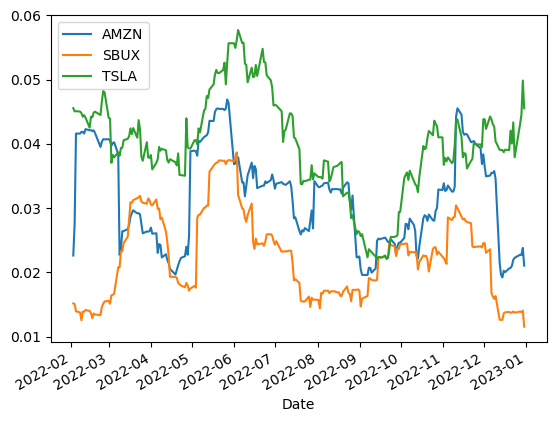

In [169]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
Stocks_df.rolling(window=21).std().plot()


### Calculate and plot the correlation

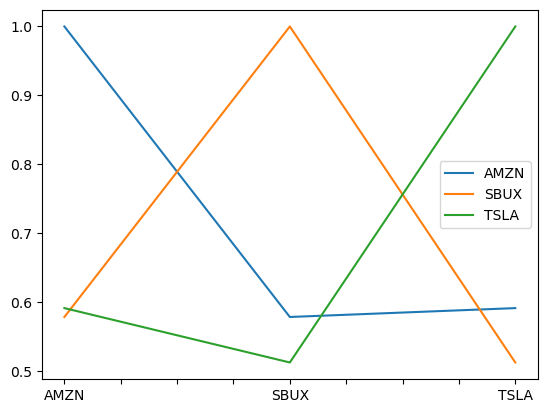

In [170]:
# Calculate and plot the correlation

correlation_1 = Stocks_df.corr().plot()



### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: xlabel='Date'>

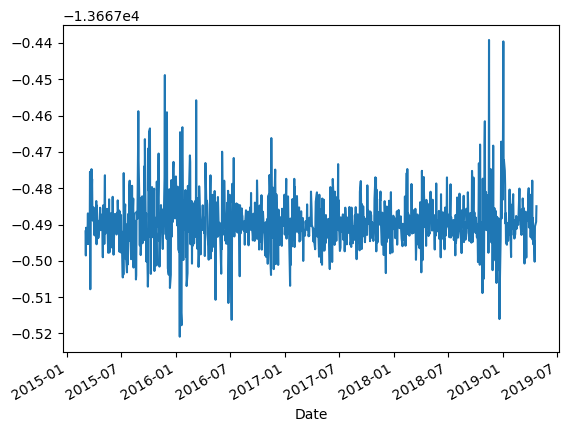

In [171]:
# Calculate and plot Beta

covariance_1 =Stocks_df['AMZN']
covariance_1


# Calculate variance of S&P 500
varianceSp_2 =df['SpDaily_returns'].var()
varianceSp_2


# Computing beta
beta1 = covariance-1 / varianceSp_2
beta1

# Plot beta trend
beta1.plot()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios



In [ ]:
# Visualize the sharpe ratios as a bar plot



### How does your portfolio do?

Write your answer here!

In [ ]:
My Portfolio is very versatile, it does not exactly correlate with one another so the results are a bit scattered.